<a href="https://colab.research.google.com/github/rafaSouzaLima/atividade-anisio/blob/main/Atividade03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obtenção dos Dados

In [1]:
# importar os pacotes necessarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette='rocket')
#sns.color_palette("flare", as_cmap=True)

from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Colab Notebooks"

# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv(path + '/pessoas.csv', sep=',')

Mounted at /content/drive


In [2]:
print(f'Colunas: {df.columns}')
print(f'Linhas: {df.shape[0]}')
df.head(10)

Colunas: Index(['regiao', 'idade', 'renda', 'estado_civil', 'educacao', 'tempo_emprego',
       'situacao_aposentadoria', 'genero', 'codigo_residencia', 'altura'],
      dtype='object')
Linhas: 1000


,regiao,idade,renda,estado_civil,educacao,tempo_emprego,situacao_aposentadoria,genero,codigo_residencia,altura
0,Rio de Janeiro,44,64,1,Mestrado,5,0,0,Casa,1.69
1,Goiás,33,136,1,Doutorado,5,0,0,Chalé,1.98
2,Goiás,52,116,1,Fundamental,29,0,1,Casa,1.87
3,Rio de Janeiro,33,33,0,Medio,0,0,1,Apartamento,1.80
4,Rio de Janeiro,30,30,1,Fundamental,2,0,0,Sítio,1.58
5,Rio de Janeiro,39,78,0,Medio,16,0,1,Apartamento,1.58
6,Goiás,22,19,1,Medio,4,0,1,Fazenda,1.53
7,Rio de Janeiro,35,76,0,Medio,10,0,0,Condomínio,1.93
8,Goiás,59,166,1,Mestrado,31,0,0,Fazenda,1.80
9,São Paulo,41,72,1,Fundamental,22,0,0,Condomínio,1.85


# Análise dos Dados

## Variáveis
- Região(`regiao`): Estado Brasileiro;
- Idade(`idade`): Idade da Pessoa;
- Renda(`renda`): Renda anual (em mil reais);
- Estado(`estado_civil`): 0 é solteiro e 1 é casado;
- Educação(`educacao`): Nível de escolaridade;
- Tempo de Emprego(`tempo_emprego`): Tempo em anos de emprego;
- Situação Aposentadoria(`situacao_aposentadoria`): 0 é não aposentado, e 1 aposentado;
- Gênero(`genero`): 0 é masculino e 1 é feminino;
- Código residência(`codigo_residencia`): Tipo de residência;
- Altura(`altura`): Altura em metros.

Antes de fazer uma análise, vamos apenas verificar se existem valores nulos dentro das colunas utilizadas.

In [3]:
nulos = df.isnull().sum()

percentual_nulos = (nulos / len(df)) * 100

tabela_nulos = pd.DataFrame({
    'Frequência' : nulos,
    'Percentual (%)' : percentual_nulos
})

tabela_nulos

,Frequência,Percentual (%)
regiao,0,0.0
idade,0,0.0
renda,0,0.0
estado_civil,0,0.0
educacao,0,0.0
tempo_emprego,0,0.0
situacao_aposentadoria,0,0.0
genero,0,0.0
codigo_residencia,0,0.0
altura,0,0.0


Como não temos valores nulos, podemos prosseguir com a análise.

In [4]:
# Descrição estatística dos dados
df.describe()

,idade,renda,estado_civil,tempo_emprego,situacao_aposentadoria,genero,altura
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.684000,77.535000,0.495000,10.987000,0.047000,0.517000,1.745230
std,12.558816,107.044165,0.500225,10.082087,0.211745,0.499961,0.146006
min,18.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.500000
25%,32.000000,29.000000,0.000000,3.000000,0.000000,0.000000,1.620000
50%,40.000000,47.000000,0.000000,8.000000,0.000000,1.000000,1.750000
75%,51.000000,83.000000,1.000000,17.000000,0.000000,1.000000,1.870000
max,77.000000,1668.000000,1.000000,47.000000,1.000000,1.000000,2.000000


Analisando a descrição dos dados dessa tabela podemos ver que a única coluna que possui um comportamento considerado "anormal", é a coluna de renda que possui um desvio padrão superior a 100 mil reais de renda anual, o que é um valor demasiadamente alto para a variação de renda. Fora que 75% da amostra possui até 86 mil reais de renda anual, e o valor máximo é de 1,668 milhões de reais, o que já mostra que essa amostra possui outliers nos dados de renda anual.

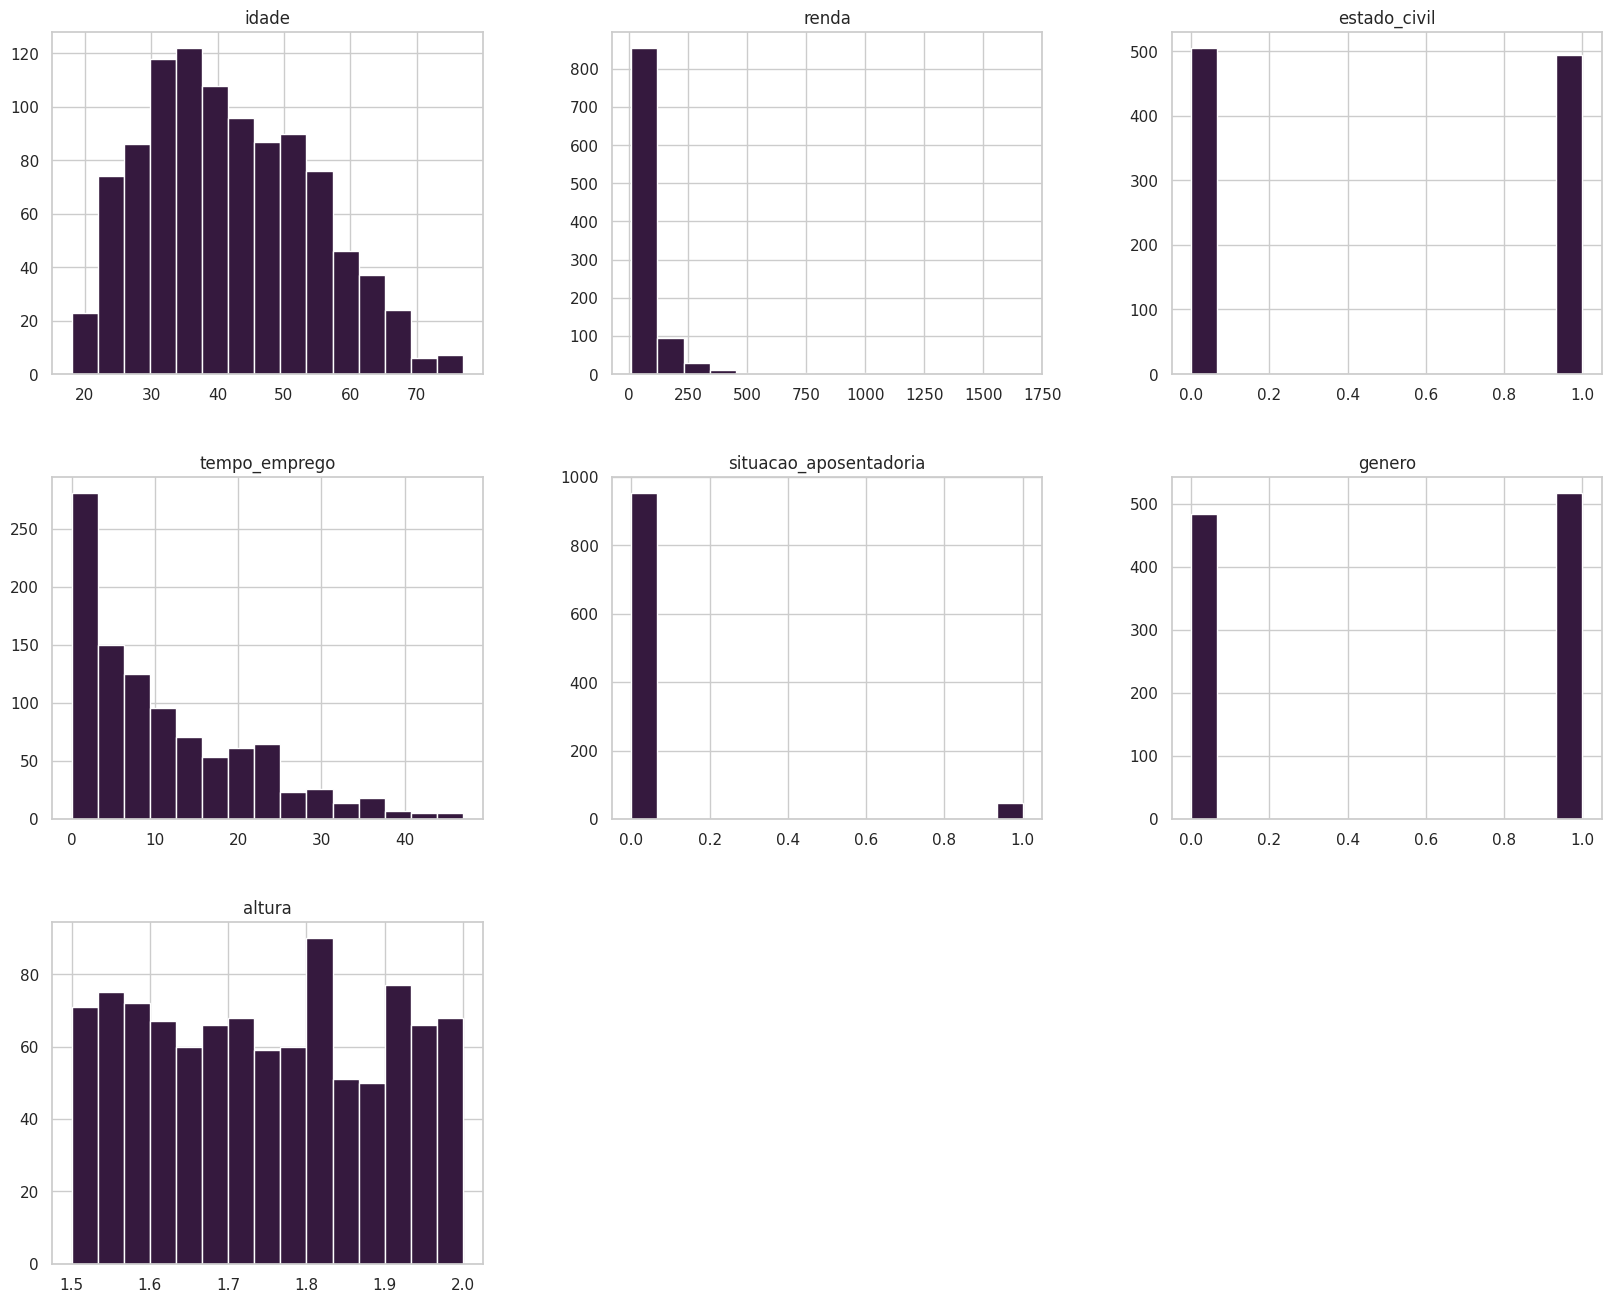

In [5]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(20,16));

Pelos histogramas plotados, pode-se concluir que:
- Para atributos booleanos como `Situação Aposentadoria`, `Gênero` e `Estado Civil` não possuem variações intermediárias por ser variáveis discretas.
- A distribuição de alturas se aproxima de uma distribuição uniforme, tendo em vista o baixo desvio padrão.
- A distribuição do tempo de emprego é à direita ou positiva, indicando que os tempos de emprego se concentram nos indivíduos com menos tempo de trabalho.
- A distribuição das idades se aproxima de uma distribuição normal.
- Por fim, a renda pode-se observar uma baixa variabilidade, o que indica que existem muitos valores discrepantes para essa coluna.

In [6]:
renda_media = df.groupby('codigo_residencia').renda.mean()
print(f'A renda média por tipo de residência. Valores em reais, e relativos a 1 ano\n{renda_media}')

A renda média por tipo de residência. Valores em reais, e relativos a 1 ano
codigo_residencia
Apartamento    86.485333
Casa           83.518382
Chalé          62.517241
Condomínio     66.101449
Fazenda        45.150000
Mansão         72.250000
Outro          32.500000
Sítio          69.900000
Name: renda, dtype: float64


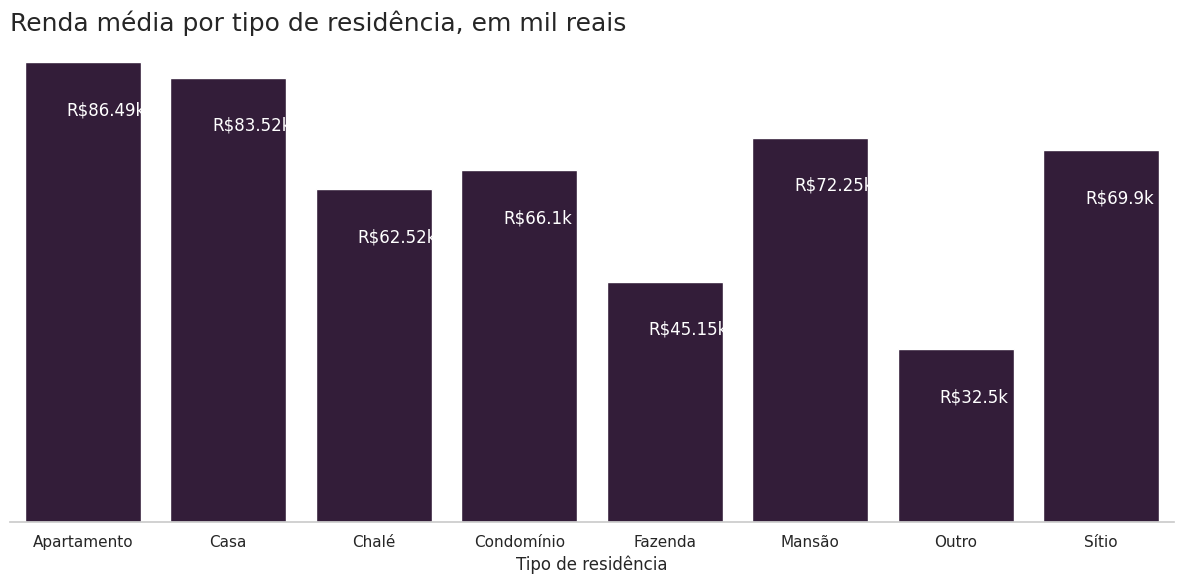

In [7]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.barplot(x=renda_media.index, y=renda_media.values)
ax.set_title('Renda média por tipo de residência, em mil reais', loc='left', fontsize=18)
ax.set_xlabel('Tipo de residência')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelleft = False)
ax.grid(False)

for i in range(renda_media.values.shape[0]):
  ax.text(i-.11, renda_media.values[i]-10, f'R${round(renda_media.values[i], 2)}k', fontsize=12, color='white')

plt.tight_layout()

Como pode-se ver pessoas que moram em apartamento e casa, possuem renda anual média maior do que pessoas que moram em chalé, fazenda. Nesse caso, podem-se observar mais anormalidades, sendo que pessoas que possuem uma mansão ganham menos que pessoas que tem apartamento e uma casa.

In [8]:
correlacao = df.corr(numeric_only=True)
correlacao

,idade,renda,estado_civil,tempo_emprego,situacao_aposentadoria,genero,altura
idade,1.000000,0.327948,-0.014433,0.670047,0.429440,-0.011419,0.003375
renda,0.327948,1.000000,-0.043984,0.516349,-0.083651,0.038706,0.002035
estado_civil,-0.014433,-0.043984,1.000000,-0.002891,-0.078109,0.008345,-0.033700
tempo_emprego,0.670047,0.516349,-0.002891,1.000000,0.277401,0.046016,0.005024
situacao_aposentadoria,0.429440,-0.083651,-0.078109,0.277401,1.000000,0.053906,0.017620
genero,-0.011419,0.038706,0.008345,0.046016,0.053906,1.000000,-0.002522
altura,0.003375,0.002035,-0.033700,0.005024,0.017620,-0.002522,1.000000


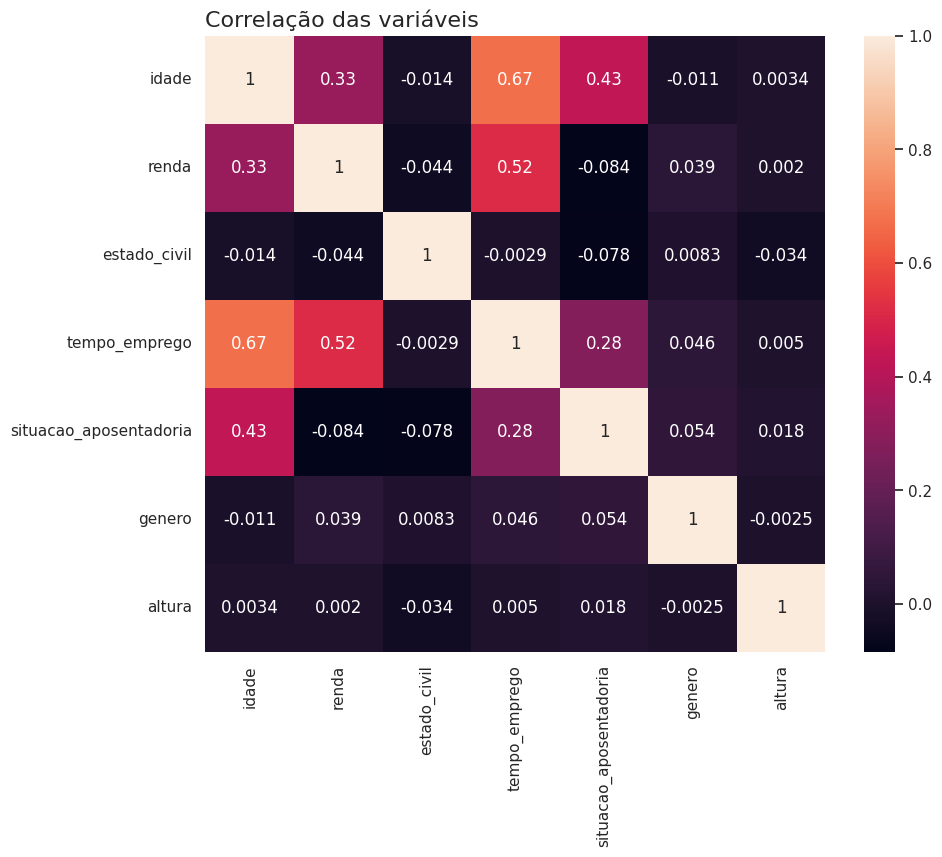

In [9]:
# plotar um heatmap a partir das correlações
plt.figure(figsize=(10,8))
sns.heatmap(correlacao, annot=True, cmap='rocket')
plt.title('Correlação das variáveis', loc='left', fontsize=16)
plt.show()

A correlação mais forte vista entre a renda e outras variáveis numéricas, é o tempo de emprego, com uma correlação de 52%. Isso significa que o tempo de emprego parcialmente explica as variações altas de renda das pessoas dessa amostra. Além disso outra correlação menos forte mas ainda visívei é com a idade de 33%, que pode explicar outra parte das variações de renda.

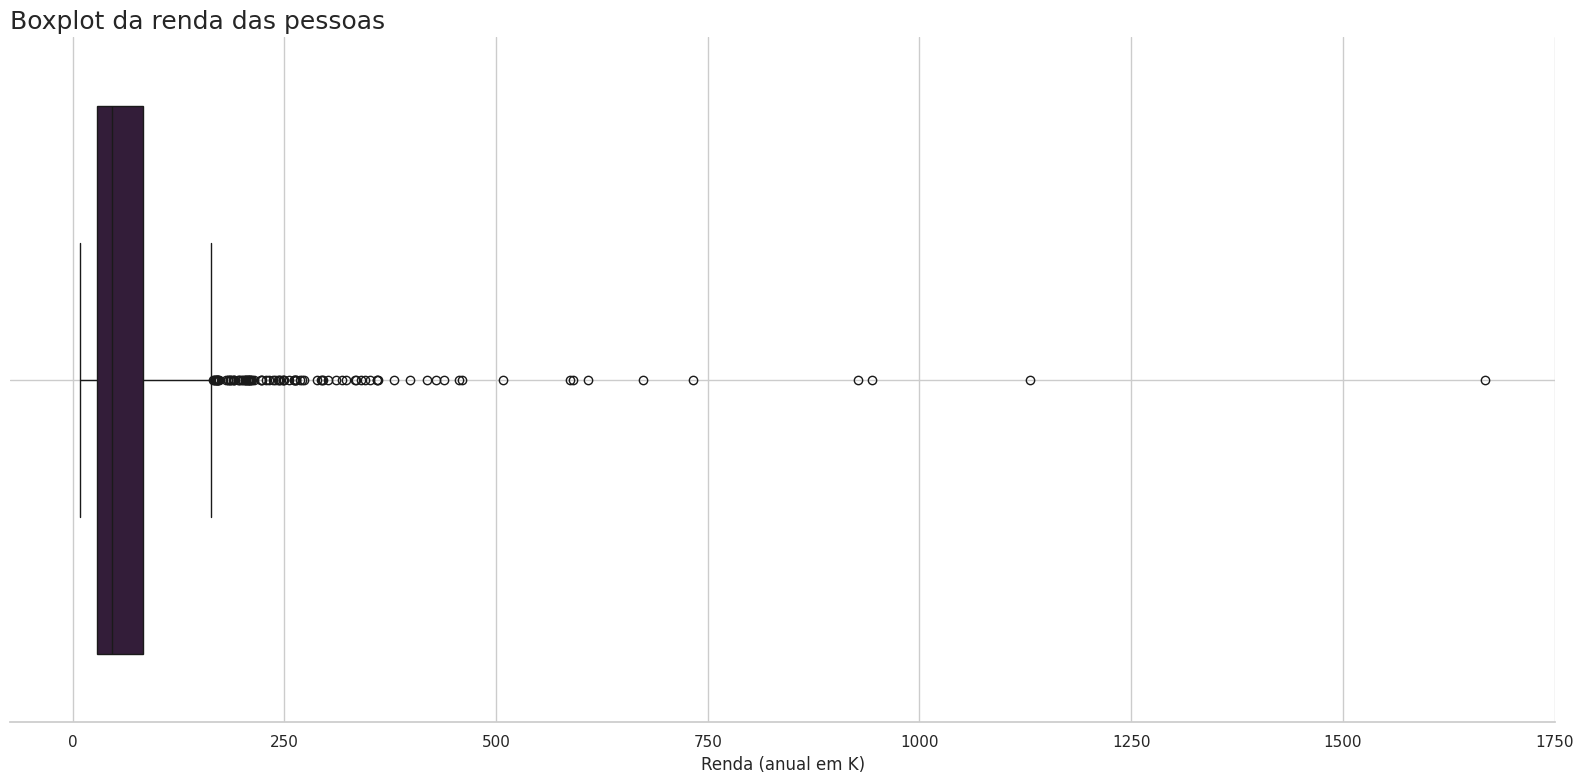

In [10]:
# Gráfico de boxplot para ver a distribuição
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.boxplot(data=df, x='renda')
ax.set_title('Boxplot da renda das pessoas', loc='left', fontsize=18)
ax.set_xlabel('Renda (anual em K)')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(True)

plt.tight_layout()

Como pode ser visto, a renda realmente possui um elevado número de outliers, que em tese se refere a pessoas que ganham uma grande quantidade de dinheiro.

Nesse caso em específico, não seria recomendado remover os outliers para analisar a amostra, em razão de que a renda é realmente algo esperado tanto em teoria quanto na prática, de existir esse tipo de variação. Mas para fins práticos, podemos analisar a renda sem os outliers e realizar inferências para a parte que menos ganha dinheiro para essa amostra.

# Dataset sem outliers


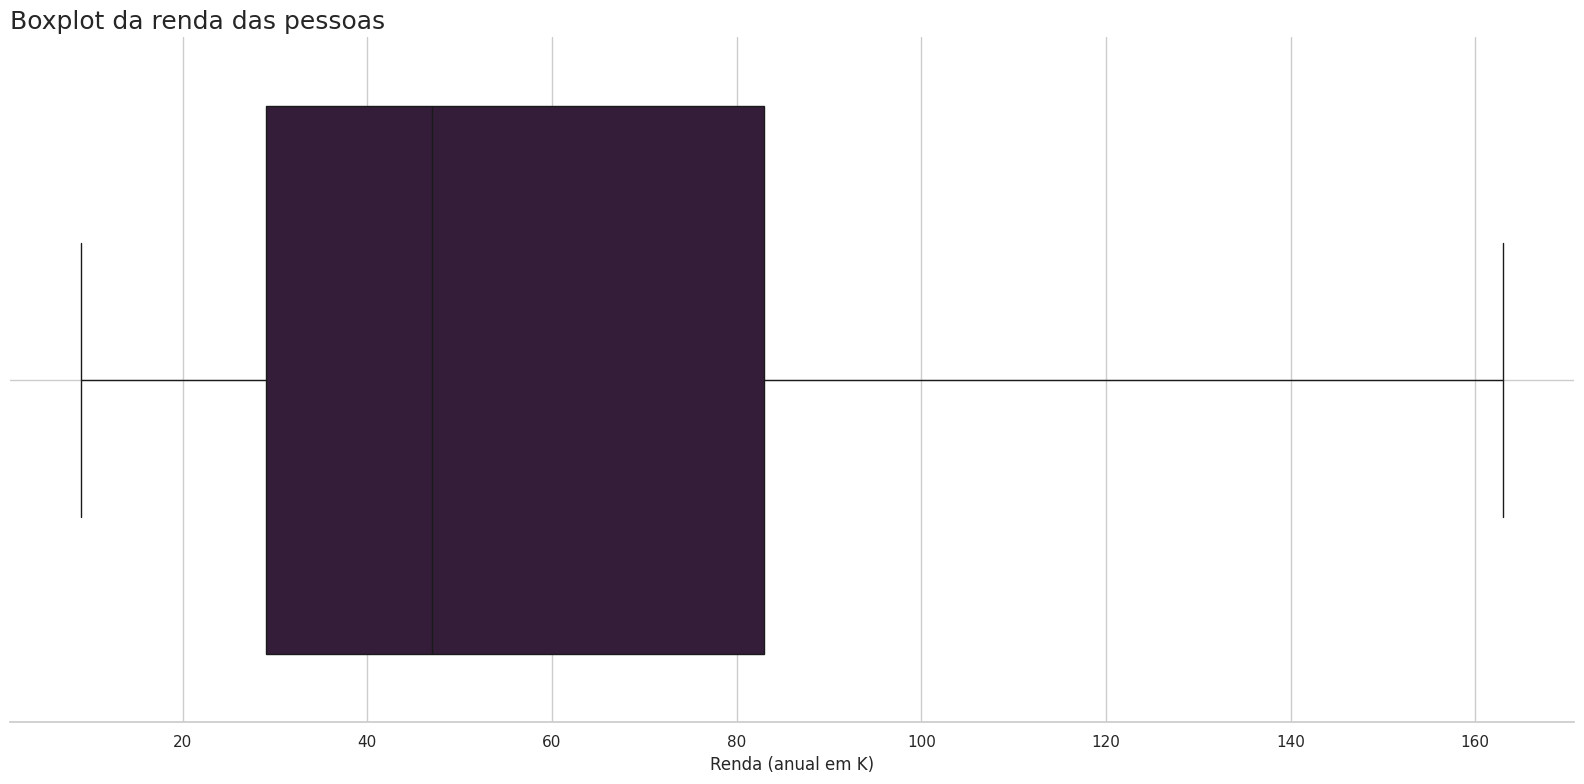

In [18]:
# Gráfico de boxplot para ver a distribuição
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.boxplot(data=df, x='renda', showfliers=False)
ax.set_title('Boxplot da renda das pessoas', loc='left', fontsize=18)
ax.set_xlabel('Renda (anual em K)')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(True)

plt.tight_layout()

Ainda podemos ver que a maior parte da amostra (`75%`) se encontra abaixo dos 100 mil reais anuais de renda. Além disso metade da amostra se encontra abaixo dos 50 mil reais anuais.

In [12]:
Q1 = df.renda.quantile(0.25)
Q3 = df.renda.quantile(0.75)

IQR = Q3-Q1

# Valores limites para corte
print(Q1 - 1.5*IQR)
print(Q3 + 1.5*IQR)

-52.0
164.0


In [13]:
# Criando uma cópia do dataset para limpeza
df_clean = df.copy()

# Vou limitar o valor mínimo em 0, já que pelo cáculo foi encontrado um valor negativo.
df_clean.drop(df_clean[df_clean.renda <= 0].index, axis=0, inplace=True)
# O valor máximo mantenho o cálculo de Q3 + 1.5*IQR
df_clean.drop(df_clean[df_clean.renda > (Q3 + 1.5*IQR)].index, axis=0, inplace=True)

print(f'O dataset original possui {df.shape[0]} amostras')
print(f'O dataset limpo agora possui {df_clean.shape[0]} amostras')

O dataset original possui 1000 amostras
O dataset limpo agora possui 907 amostras


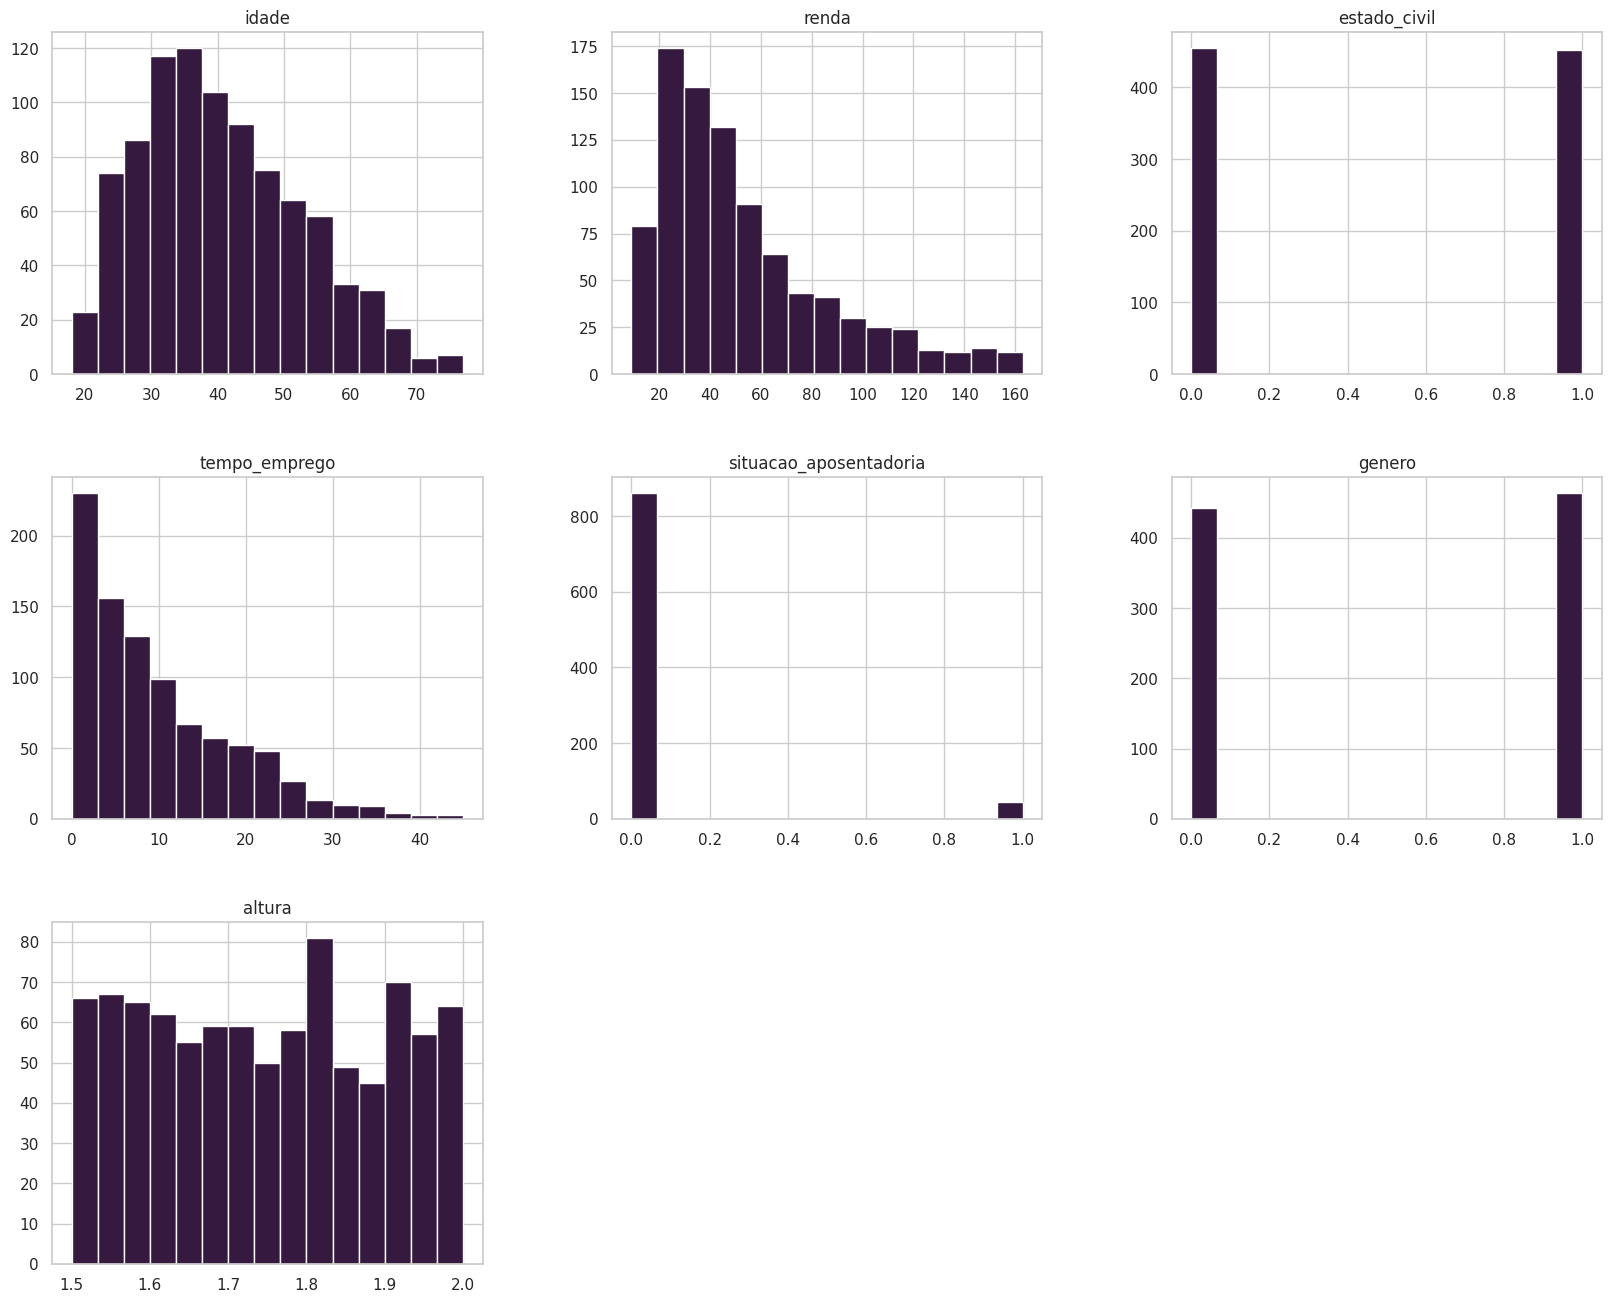

In [14]:
# plotar o histograma das variáveis numéricas
df_clean.hist(bins=15, figsize=(20,16));

In [15]:
correlacao = df_clean.corr(numeric_only=True)
correlacao

,idade,renda,estado_civil,tempo_emprego,situacao_aposentadoria,genero,altura
idade,1.000000,0.304874,-0.007919,0.628114,0.478808,-0.035421,0.002359
renda,0.304874,1.000000,0.007790,0.509408,-0.136916,0.004741,-0.007245
estado_civil,-0.007919,0.007790,1.000000,0.007398,-0.089683,0.025442,-0.052137
tempo_emprego,0.628114,0.509408,0.007398,1.000000,0.366660,0.007209,0.000621
situacao_aposentadoria,0.478808,-0.136916,-0.089683,0.366660,1.000000,0.054961,0.012271
genero,-0.035421,0.004741,0.025442,0.007209,0.054961,1.000000,-0.005438
altura,0.002359,-0.007245,-0.052137,0.000621,0.012271,-0.005438,1.000000


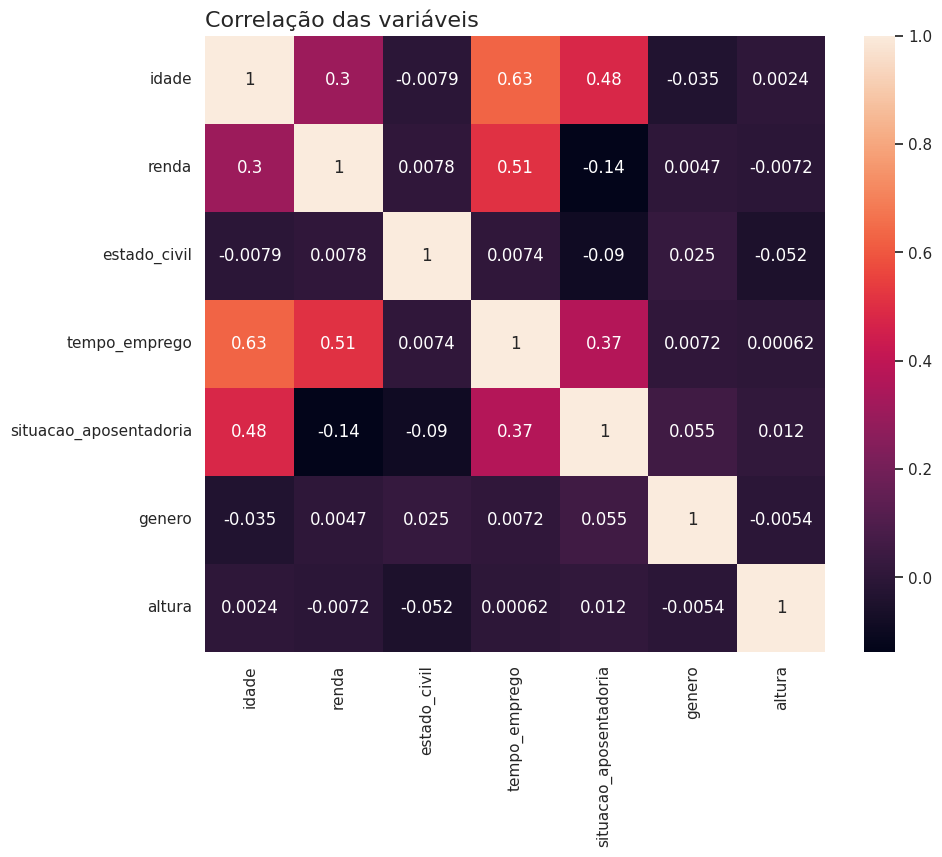

In [16]:
# plotar um heatmap a partir das correlações
plt.figure(figsize=(10,8))
sns.heatmap(correlacao, annot=True, cmap='rocket')
plt.title('Correlação das variáveis', loc='left', fontsize=16)
plt.show()

Como pode-se ver para outras variáveis não booleanas, não houveram mudanças significativas nas outras correlações da idade e do tempo de emprego com a renda.

In [19]:
renda_media = df_clean.groupby('codigo_residencia').renda.mean()
print(f'A renda média por tipo de residência. Valores em reais, e relativos a 1 ano\n{renda_media}')

A renda média por tipo de residência. Valores em reais, e relativos a 1 ano
codigo_residencia
Apartamento    54.952381
Casa           54.746835
Chalé          46.777778
Condomínio     50.700000
Fazenda        43.101695
Mansão         72.250000
Outro          32.500000
Sítio          54.348214
Name: renda, dtype: float64


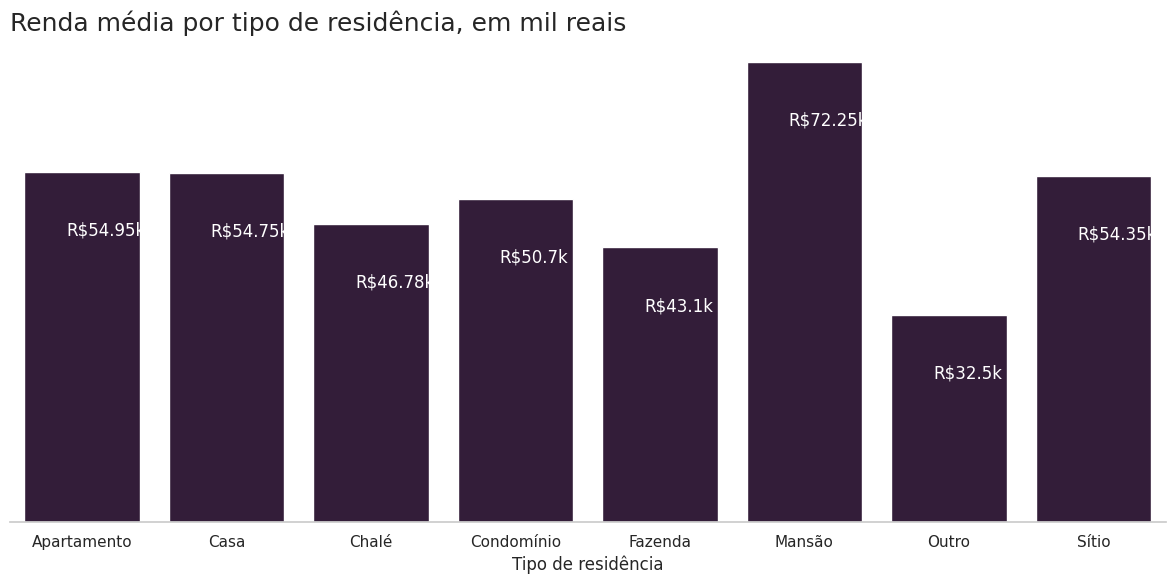

In [20]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.barplot(x=renda_media.index, y=renda_media.values)
ax.set_title('Renda média por tipo de residência, em mil reais', loc='left', fontsize=18)
ax.set_xlabel('Tipo de residência')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelleft = False)
ax.grid(False)

for i in range(renda_media.values.shape[0]):
  ax.text(i-.11, renda_media.values[i]-10, f'R${round(renda_media.values[i], 2)}k', fontsize=12, color='white')

plt.tight_layout()

Já no caso dos códigos de diferentes residêcias houve uma mudança interessante sem os outliers na renda. Percebe-se que pessoas que moram em mansão possuem uma renda superior a outros tipos de residência, não existindo muitas diferenças significativas entre outros tipos de residência.

# Conclusões

A análise dos dados da base `pessoas.csv` foi realizada para as rendas, tempo de emprego e tipos de moradia para as pessoas da amostra.
- É possível observar que essa amostra possui um elevado número de `outliers` para a variável da renda anual em K;
- Aparentemente existe uma correlação moderada entre a renda e o tempo de emprego das pessoas dessa amostra, o que significa que quanto maior o tempo de emprego, de fato a renda anual pode de fato aumentar;
- Além disso, é possível ver uma correlação baixa com a idade, que indica que em alguns casos, pessoas mais velhas possuem uma renda maior do que pessoas mais novas, até certo ponto, por ser uma correlação mais fraca.
- Ao remover os `outliers` pode-se observar que as pessoas que moram em mansões possuem uma renda maior do que pessoas que moram em moradias como casas e apartamentos. Esse comportamento parece não acontecer para os `outliers` da amostra, revelando que não há muita relação entre a renda e o tipo de moradia, quando a renda possui saltos exorbitantes.